# Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
pca_df = pd.read_csv("plink.eigenvec", sep = ' ', header=None)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


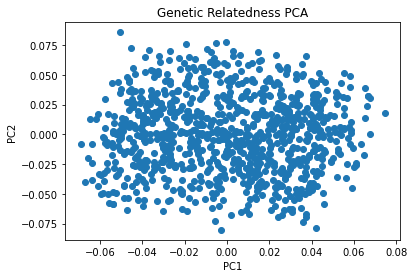

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = pca_df[2], y = pca_df[3]) #ploting just the 1st and 2nd components
ax.set_xlabel( "PC1" )
ax.set_ylabel( "PC2" )
ax.set_title( "Genetic Relatedness PCA" )

plt.show()

# Question 2

In [4]:
import re

In [5]:
fs = open('renumbered.vcf', 'r')

allele_f = []

for line in fs:
    if re.match('^#', line):   #Ignore the header lines
        continue
    
    columns = line.rstrip().split() #split vcf for parsing
    
    num_f = columns[7].split('=')
    allele = num_f[1]
    multiples = allele.split(',')#Splitting to pull out the first AF value
    all_f = multiples[0]
    all_f = float(all_f)
        
    allele_f.append(all_f)
        
        

fs.close()

In [6]:
allele_f[0:10]

[0.690206,
 0.710472,
 0.565776,
 0.503932,
 0.712679,
 0.713408,
 0.695903,
 0.493498,
 0.496109,
 0.5215]

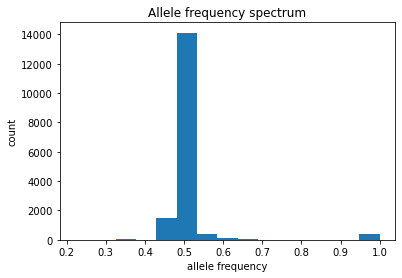

In [7]:
fig, ax = plt.subplots()

ax.hist(allele_f, bins=15)#basic histogram of the AF values

ax.set_title('Allele frequency spectrum')
ax.set_xlabel('allele frequency')
ax.set_ylabel('count')
plt.show()

# Question 3

In [8]:
#Correcting the phenotype file so that the plank analysis can be performed

fs = open('BYxRM_PhenoData.txt', 'r')
nfs = open('n_Phenotype.txt', 'w')

for line in fs:
    pars = line.split()
    
    if 'Caffeine' in line: #gives new header line
        line = 'FID\tIID\t'+ line
        nfs.write(line)
    else:
        pairs = line.split("_")
        split = pairs[0] + '\t' + pairs[1] #makes tab seperation between the FID and IID
        nfs.write(split)
        
fs.close()
nfs.close()

# Question 4

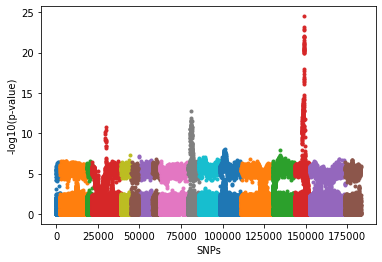

In [9]:
#practicing making the Manhattan plots

gwas = pd.read_csv("plink.Caffeine.assoc.linear", sep = "\s+")
gwas['logP'] = -1 * np.log10(gwas['P']) #transform the P values with log10
gwas['snp_index'] = range(len(gwas)) #give each snp an index

gwas

fig, ax = plt.subplots()

signif = 5

for chr in range(1, 27): #covers all the chromosomes - including 'M' which is '26' in this data set
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr],  marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

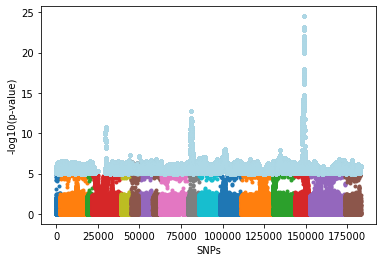

In [10]:
#coloring significant p-values
gwas = pd.read_csv("plink.Caffeine.assoc.linear", sep = "\s+")
gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))

sigp = gwas.query('snp_index >= 0 & logP > 5')

fig, ax = plt.subplots()

signif = 5

for chr in range(1, 27): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr],  marker = '.')
    ax.scatter(sigp.snp_index, sigp.logP, color = 'lightblue', marker = '.')
plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

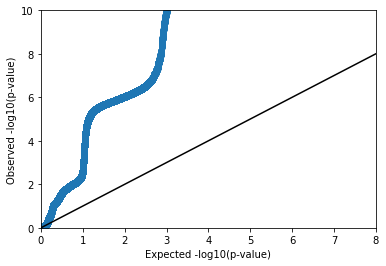

In [11]:
#qqplot practice
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval']) #Gives the theoretical -log10 p-values

gwas['snp_index'] = range(len(gwas)) #generating the snp_index

fig, ax = plt.subplots()

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()


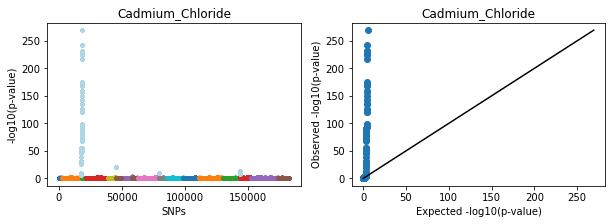

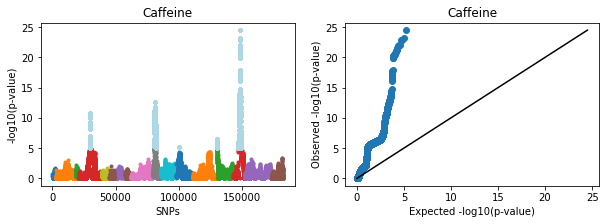

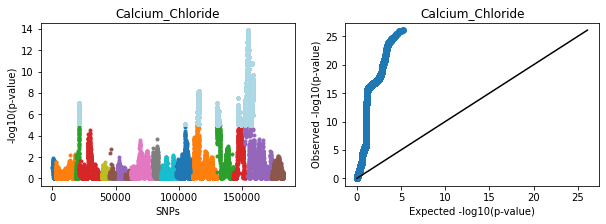

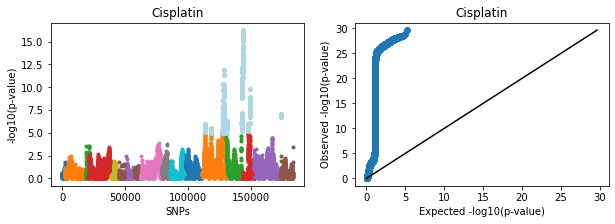

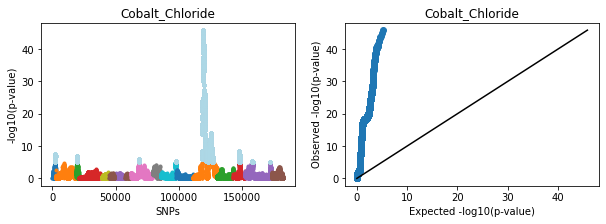

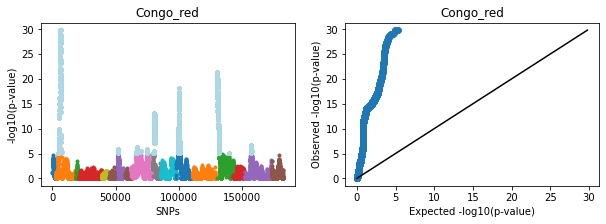

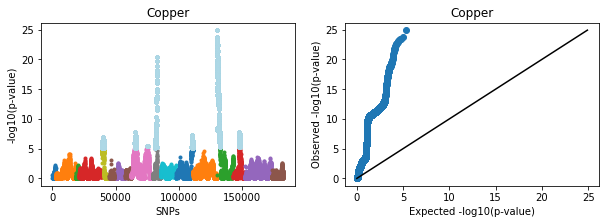

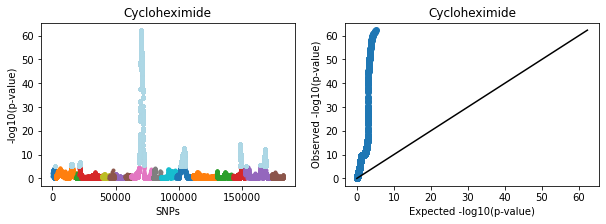

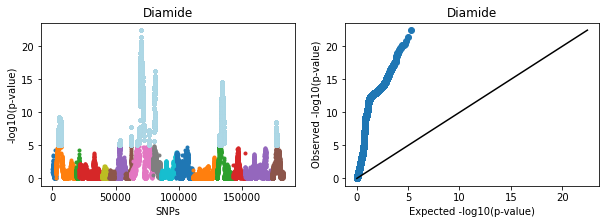

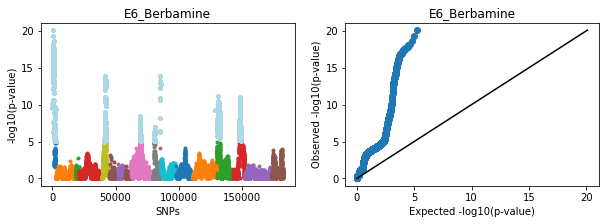

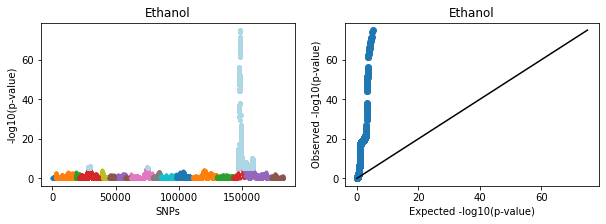

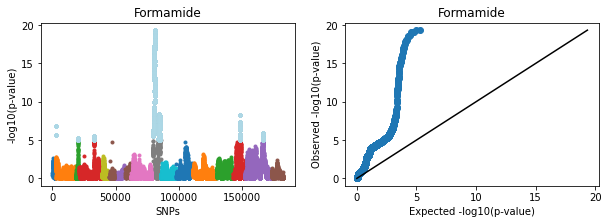

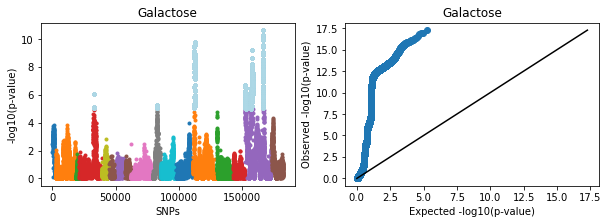

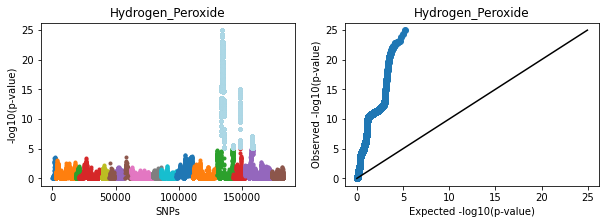

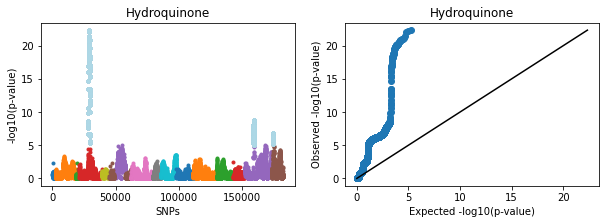

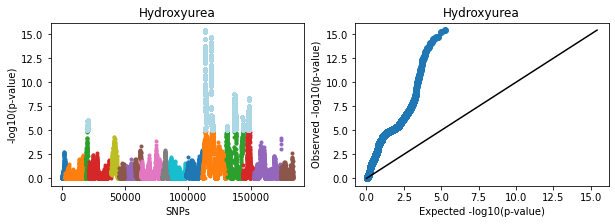

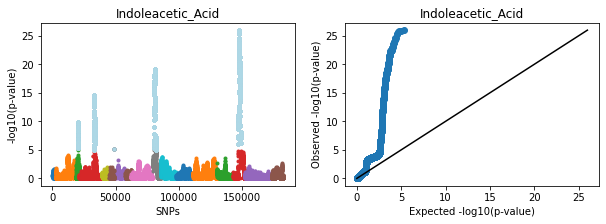

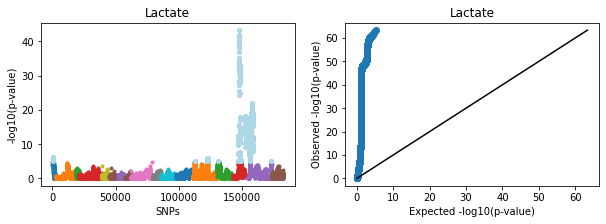

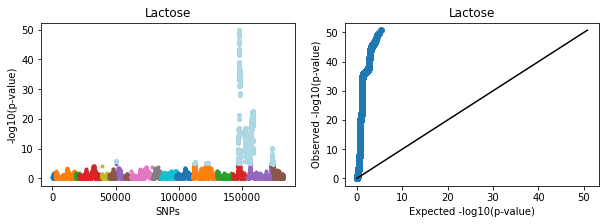

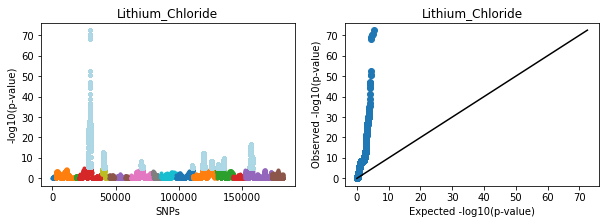

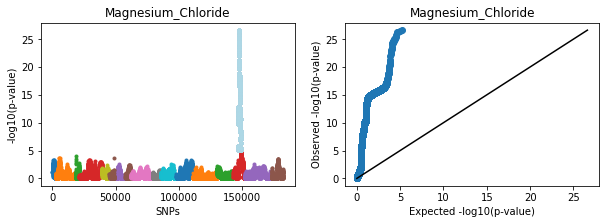

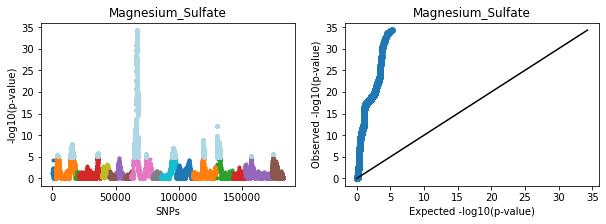

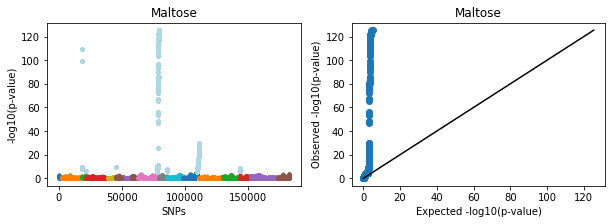

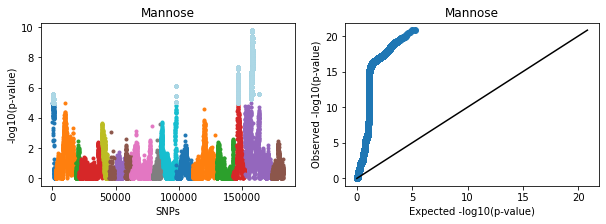

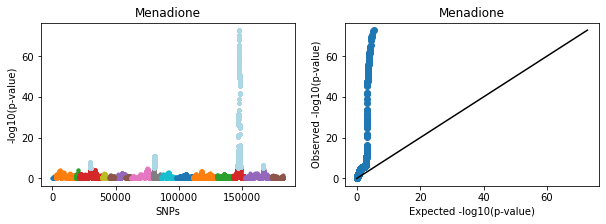

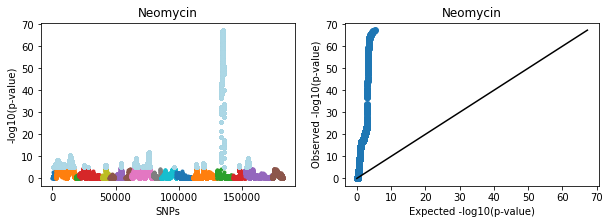

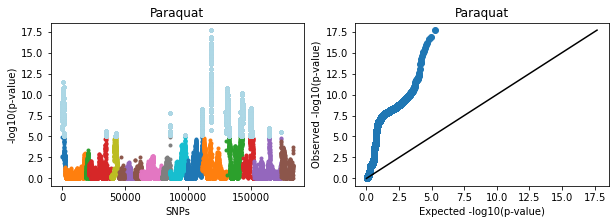

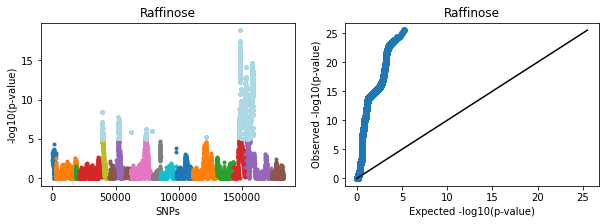

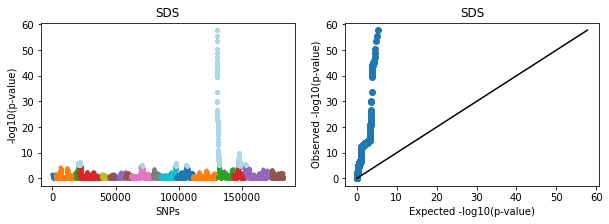

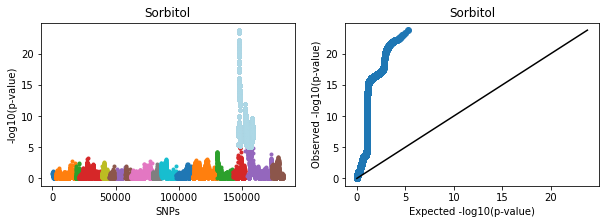

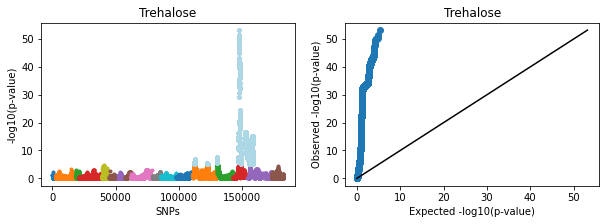

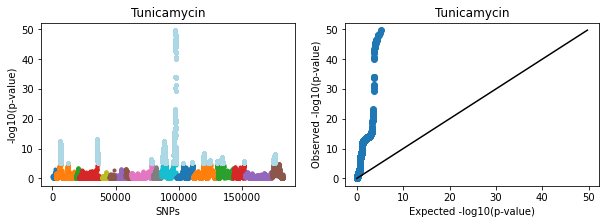

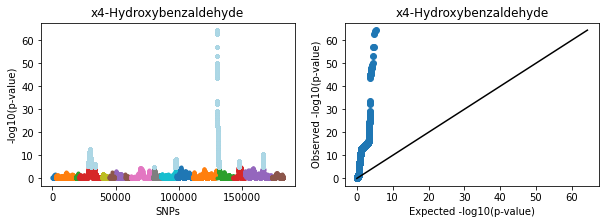

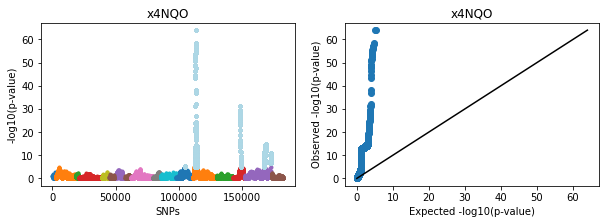

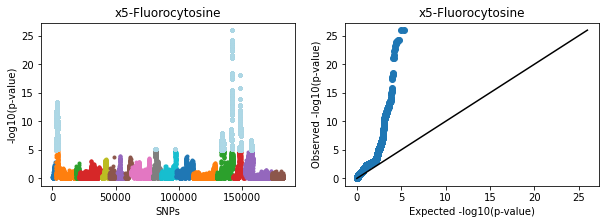

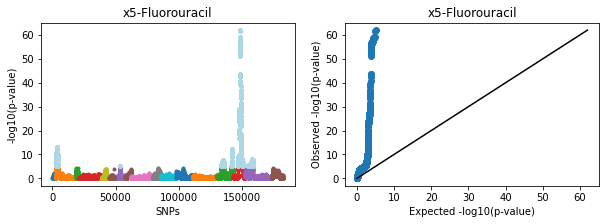

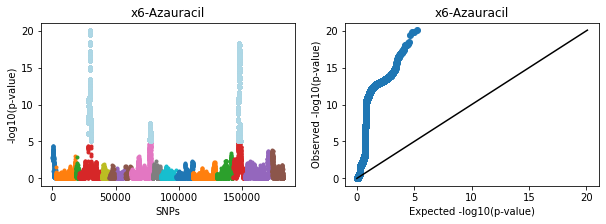

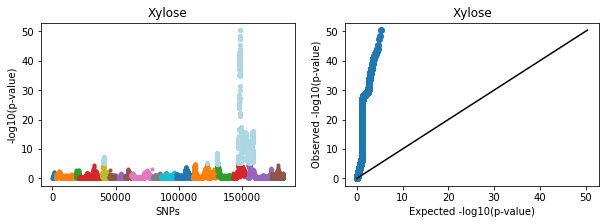

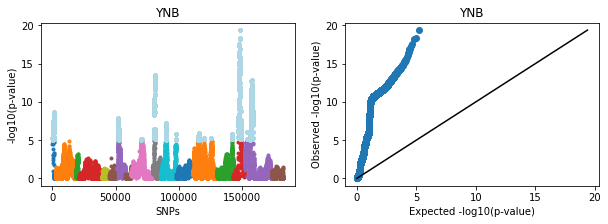

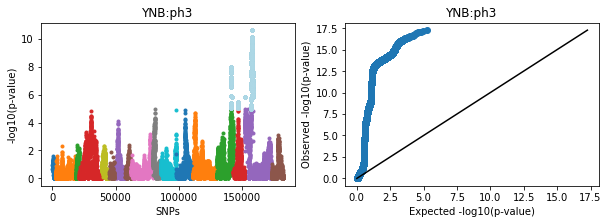

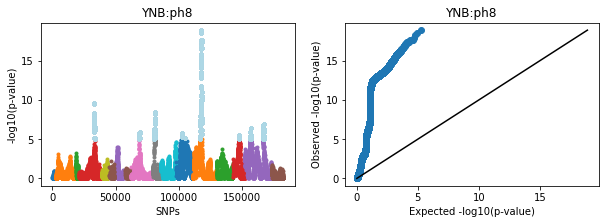

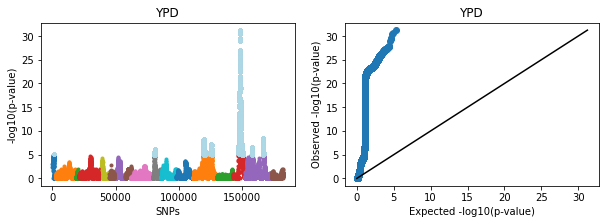

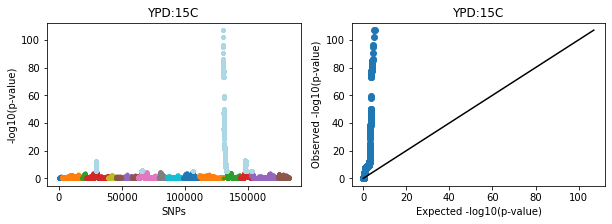

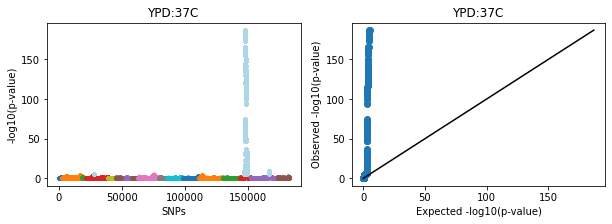

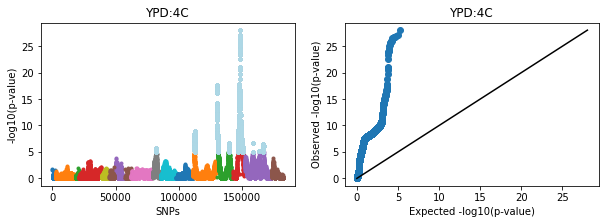

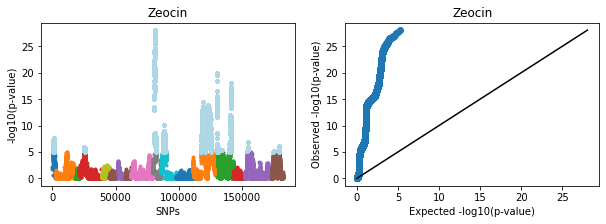

In [19]:
#Making a loop for making graphs for each data set.
#First listing out all the phenotpes
phenotypes = ["Cadmium_Chloride", "Caffeine", "Calcium_Chloride", "Cisplatin", "Cobalt_Chloride", "Congo_red",
             "Copper", "Cycloheximide", "Diamide", "E6_Berbamine", "Ethanol", "Formamide", "Galactose", 
             "Hydrogen_Peroxide", "Hydroquinone", "Hydroxyurea", "Indoleacetic_Acid", "Lactate", "Lactose",
             "Lithium_Chloride", "Magnesium_Chloride", "Magnesium_Sulfate", "Maltose", "Mannose", "Menadione",
             "Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin",
              "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", "x5-Fluorouracil", "x6-Azauracil", 
             "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]

#parse through the phenotypes list
for i in phenotypes:
    gwas = pd.read_csv("plink." + i + ".assoc.linear", sep = "\s+") #Opens each file
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))



    fig = plt.figure(figsize=(10.0, 3.0))

    manh = fig.add_subplot(1, 2, 1) #plot for the Manhatten plots
    qqplot = fig.add_subplot(1, 2, 2) #plot for the QQplot
    
    gwas_a = gwas["TEST"] == "ADD"
    just_add = gwas.loc[gwas_a , :]
    sigp = just_add.query('snp_index >= 0 & logP > 5') #for coloring significant SNPs
    
    for chr in range(1, 27): 
        manh.scatter(gwas["snp_index"][gwas["CHR"] == chr][gwas["TEST"]=="ADD"], gwas["logP"][gwas["CHR"] == chr][gwas["TEST"]=="ADD"], marker = '.')
        manh.scatter(sigp.snp_index, sigp.logP, color = 'lightblue', marker = '.')

    manh.set_title(i)
    manh.set_xlabel("SNPs")
    manh.set_ylabel("-log10(p-value)")
    
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])

    gwas['snp_index'] = range(len(gwas))

    qqplot.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    qqplot.plot([max(gwas_sorted["logP"]),0], [max(gwas_sorted["logP"]),0], color = "black")

    qqplot.set_title(i)
    qqplot.set_xlabel("Expected -log10(p-value)")
    qqplot.set_ylabel("Observed -log10(p-value)")


    plt.show()



# Question 5

In [13]:
SDS = pd.read_csv("plink.SDS.assoc.linear", sep = "\s+")
SDS_sorted = SDS.sort_values(by = "P")

#Used for finding the most significant SNP in SDS dataset
SDS_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
130207,13,.,24565,A,ADD,790,-0.7663,-17.58,1.589000e-58
130196,13,.,23620,A,ADD,790,0.7454,17.17,2.895000e-56
130218,13,.,25638,C,ADD,755,-0.7566,-16.87,2.672000e-54
130240,13,.,27865,G,ADD,774,-0.7354,-16.21,5.604000e-51
130229,13,.,27274,C,ADD,765,-0.7235,-15.95,1.405000e-49
...,...,...,...,...,...,...,...,...,...
182089,16,.,890346,T,COV6,741,NaN,NaN,NaN
182090,16,.,890346,T,COV7,741,NaN,NaN,NaN
182091,16,.,890346,T,COV8,741,NaN,NaN,NaN
182092,16,.,890346,T,COV9,741,NaN,NaN,NaN


In [14]:
SNP_geneotypes = pd.read_csv("chr13_24565.txt", sep = "\s+", header = None)
#the data needs to be transposed for later merging
SNP_geneotypes = SNP_geneotypes.iloc[:,9:].T.rename(columns={0:'subject_id', 1:'genotype:read_depth'})
SNP_geneotypes

,subject_id,genotype:read_depth
9,A01_01,1/1:5
10,A01_02,1/1:4
11,A01_03,1/1:6
12,A01_04,1/1:11
13,A01_05,0/0:6
...,...,...
1060,A11_92,0/0:2
1061,A11_93,1/1:1
1062,A11_94,1/1:6
1063,A11_95,0/0:7


In [15]:
pheno_scores = pd.read_csv("n_Phenotype.txt", sep = "\s+")

#noticed some varition in the IID that did not match the other file, so I corrected it (not sure if necessary)
pheno_scores['IID'] = pheno_scores['IID'].replace([1,2,3,4,5,6,7,8,9],['01', '02', '03', '04', '05', '06', '07', '08', '09'])

#making a subject_id coloumn so it can be merged with the other data frame by this column
pheno_scores['subject_id'] = pheno_scores['FID'].astype(str) + "_" + pheno_scores['IID'].astype(str)
pheno_scores = pheno_scores[["subject_id","SDS"]]
pheno_scores

,subject_id,SDS
0,A01_01,0.718639
1,A01_02,-0.706985
2,A01_03,-0.917931
3,A01_04,-2.135848
4,A01_05,-1.051158
...,...,...
1003,A11_92,NaN
1004,A11_93,NaN
1005,A11_94,NaN
1006,A11_95,NaN


In [16]:
#Making one merged data frame with genotype and phenotype data
SDS_bygene = pd.merge(SNP_geneotypes, pheno_scores, on = "subject_id")
SDS_bygene

,subject_id,genotype:read_depth,SDS
0,A01_01,1/1:5,0.718639
1,A01_02,1/1:4,-0.706985
2,A01_03,1/1:6,-0.917931
3,A01_04,1/1:11,-2.135848
4,A01_05,0/0:6,-1.051158
...,...,...,...
1003,A11_92,0/0:2,NaN
1004,A11_93,1/1:1,NaN
1005,A11_94,1/1:6,NaN
1006,A11_95,0/0:7,NaN


In [17]:
import math

In [18]:
AA = [] #0/0 Homozygote A 
AG = [] #0/1 Heterozygote
GG = [] #1/1 Homozygote G

for line in range(0, len(SDS_bygene)):
    if math.isnan(SDS_bygene.iloc[line][2]) or './.' in SDS_bygene.iloc[line][1]:
        continue
    if '0/0' in SDS_bygene.iloc[line][1]:
        AA.append(SDS_bygene.iloc[line].loc['SDS'])
    elif '0/1' in SDS_bygene.iloc[line][1]:
        AG.append(SDS_bygene.iloc[line].loc['SDS'])
    elif '1/1' in SDS_bygene.iloc[line][1]:
        GG.append(SDS_bygene.iloc[line].loc['SDS'])
        

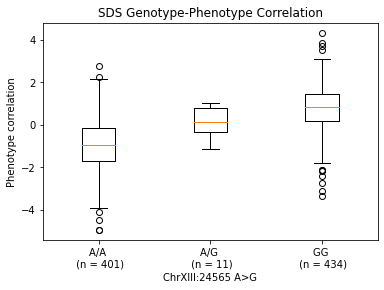

In [19]:
#Making the final boxplot of the data

data = [AA,AG,GG]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_title('SDS Genotype-Phenotype Correlation')
ax.set_ylabel("Phenotype correlation")
ax.set_xticklabels(["A/A \n (n = " + str(len(AA)) + ")","A/G \n (n = " + str(len(AG)) + ")","GG \n (n = " + str(len(GG)) + ")"])
ax.set_xlabel("ChrXIII:24565 A>G")
plt.show()